In [1]:
%cd /content/drive/MyDrive/Colab Notebooks/esgc

/content/drive/MyDrive/Colab Notebooks/esgc


In [2]:
!pwd

/content/drive/MyDrive/Colab Notebooks/esgc


### 목표
- 이미지 데이터를 분류하는 딥러닝 모델 설계 해보기

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from tensorflow.keras.datasets import mnist

In [5]:
# 데이터 로드
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
# 모양 확인
X_train.shape, X_test.shape, y_train.shape, y_test.shape

# X_train : 60000장의 데이터, 1장당 28*28

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

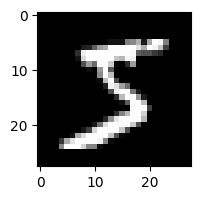

In [7]:
# 문제데이터 1ea 확인
plt.figure(figsize= (2, 2))
plt.imshow(X_train[0], cmap = "gray")

plt.show()

In [8]:
# 정답데이터 1ea 확인
y_train[10]

np.uint8(3)

In [9]:
np.unique(y_train) # 총 10개의 클래스

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [10]:
X_train[0][0][0]
# 0 : 검정색
# 255 : 흰색

np.uint8(0)

## MLP 모델링

In [11]:
# 필요한 라이브러리 호출
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Flatten

# Flatten : 다차원 구조를 1차원으로 변경(차원축소) -> Dense가 1D만 입력으로 허용하기 때문

In [12]:
# 신경망 구조 설계

# 뼈대
model = Sequential()

# 입력층
model.add(InputLayer(shape= (28, 28))) # 데이터 1개의 모양을 지정

# 은닉층
model.add(Flatten()) # 1차원으로 변환
model.add(Dense(32, activation= "relu"))
model.add(Dense(64, activation= "relu"))
model.add(Dense(128, activation= "relu"))
model.add(Dense(64, activation= "relu"))
model.add(Dense(32, activation= "relu"))

# 출력층
model.add(Dense(10, activation= "softmax")) # 각각의 클래스에 대한 확률값을 계산하는 도구(총합이 1이 되도록)

In [13]:
# 학습 방법 설정
model.compile(loss = "sparse_categorical_crossentropy",  # 정답 데이터가 1차원인 경우
                                                         # 정답 데이터가 2차원 이상인 경우(원핫인코딩 되어있는 데이터) -> categorical_crossentropy
              optimizer = "adam",
              metrics = ["accuracy"])